<a href="https://colab.research.google.com/github/srini2805/CODSOFT/blob/main/Task_4_SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your dataset:


Saving spam.csv to spam (1).csv
Ham : 0      Spam:1

Loaded and cleaned file: spam (1).csv
   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


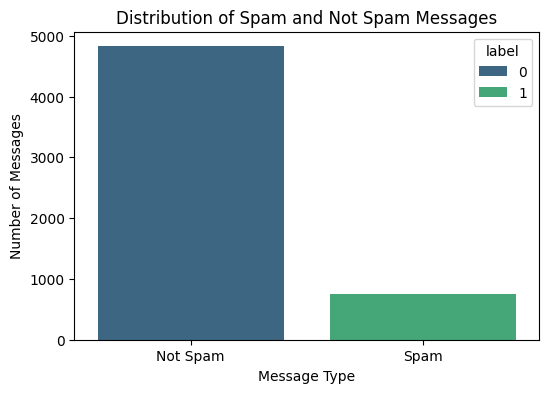


Training Logistic Regression model...

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.69      0.80       150

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

Accuracy Score: 0.9551569506726457


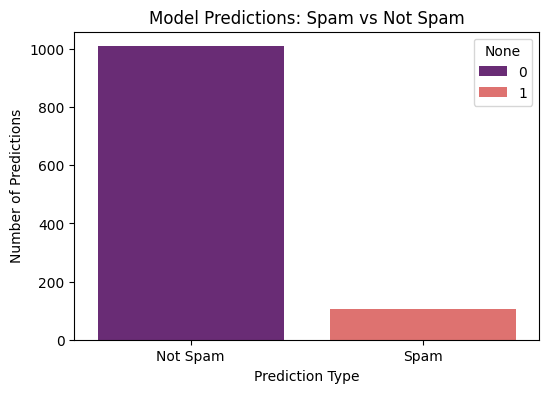

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Upload the dataset
print("Please upload your dataset:")
uploaded = files.upload()

# Step 2: Load and preprocess the dataset
print("Ham : 0      Spam:1")
for file_name in uploaded.keys():
    data = pd.read_csv(file_name, encoding='latin-1')
    data = data[['v1', 'v2']]
    data.columns = ['label', 'message']
    data['label'] = data['label'].map({'ham': 0, 'spam': 1})
    print(f"\nLoaded and cleaned file: {file_name}")
    print(data.head())

# Step 3: Visualize the dataset distribution
label_counts = data['label'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis", hue=label_counts.index)
plt.title("Distribution of Spam and Not Spam Messages")
plt.xticks(ticks=[0, 1], labels=['Not Spam', 'Spam'])
plt.ylabel("Number of Messages")
plt.xlabel("Message Type")
plt.show()

# Step 4: Feature extraction with TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf.fit_transform(data['message']).toarray()
y = data['label']

# Step 5: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train and evaluate Logistic Regression model
print("\nTraining Logistic Regression model...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 7: Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Step 8: Visualize predictions
pred_counts = pd.Series(y_pred).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=pred_counts.index, y=pred_counts.values, palette="magma", hue=pred_counts.index)
plt.title("Model Predictions: Spam vs Not Spam")
plt.xticks(ticks=[0, 1], labels=['Not Spam', 'Spam'])
plt.ylabel("Number of Predictions")
plt.xlabel("Prediction Type")
plt.show()
